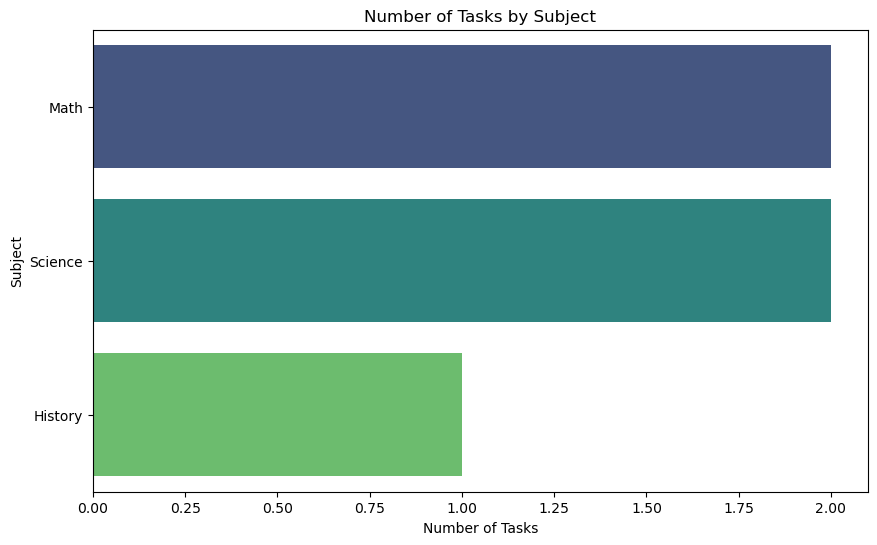

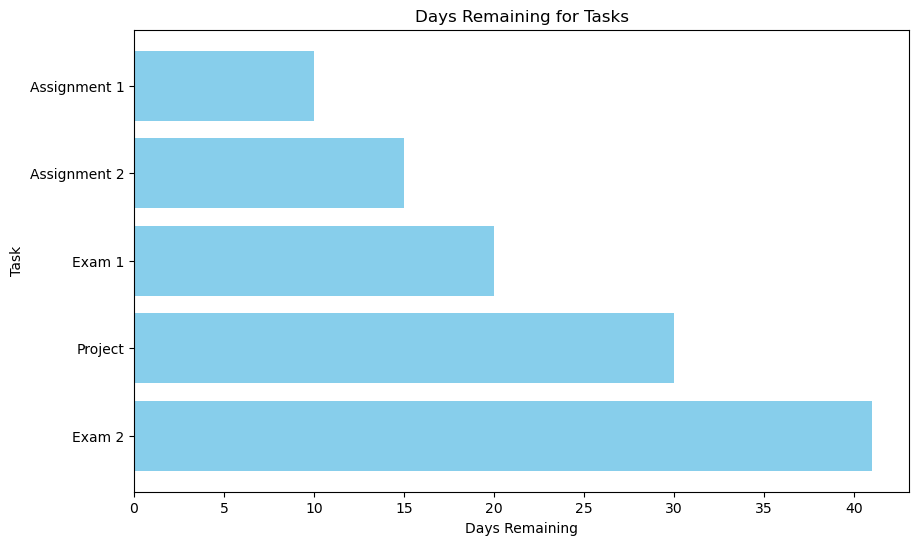

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Collect Data (sample data)
data = {
    'Task': ['Assignment 1', 'Exam 1', 'Assignment 2', 'Project', 'Exam 2'],
    'Deadline': ['2024-05-10', '2024-05-20', '2024-05-15', '2024-05-30', '2024-06-10'],
    'Subject': ['Math', 'Science', 'Math', 'History', 'Science']
}

df = pd.DataFrame(data)
df['Deadline'] = pd.to_datetime(df['Deadline'])

# Step 2: Data Preprocessing (no cleaning needed)

# Step 3: Visualize deadlines
plt.figure(figsize=(10, 6))
sns.countplot(y=df['Subject'], palette='viridis')
plt.title('Number of Tasks by Subject')
plt.xlabel('Number of Tasks')
plt.ylabel('Subject')
plt.show()

# Step 4: Calculate time remaining for each task
df['Days Remaining'] = (df['Deadline'] - pd.Timestamp.today()).dt.days

# Step 5: Prioritize tasks based on deadline
df = df.sort_values(by='Deadline')

# Step 6: Visualize workload
plt.figure(figsize=(10, 6))
plt.barh(df['Task'], df['Days Remaining'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Days Remaining for Tasks')
plt.xlabel('Days Remaining')
plt.ylabel('Task')
plt.show()


Accuracy: 0.5
              precision    recall  f1-score   support

         Low       0.50      1.00      0.67         1
      Medium       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/home/sumalatha/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sumalatha/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sumalatha/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


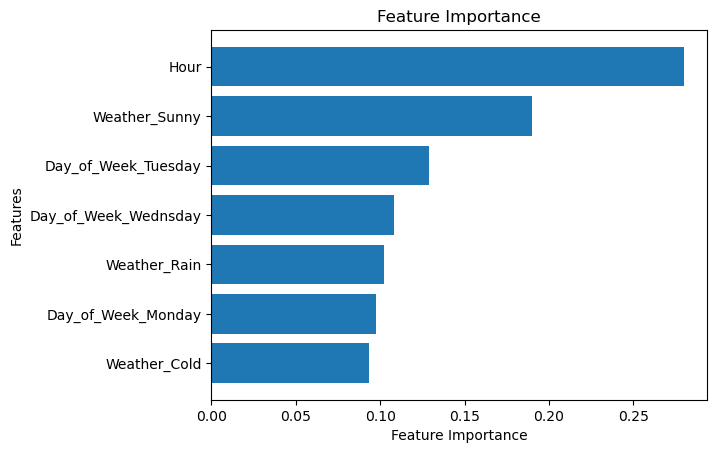

In [5]:
# Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Sample dataset
data={
    'Hour':[7, 9, 12, 9, 6, 10],
    'Day_of_Week':['Monday', 'Monday', 'Monday', 'Wednsday', 'Tuesday', 'Tuesday'],
    'Weather':['Sunny', 'Sunny', 'Cold', 'Sunny', 'Cold', 'Rain'],
    'Traffic_Congestion':['Low', 'Medium', 'High', 'Low', 'Medium', 'High']
}

# Create DataFrame
df = pd.DataFrame(data)

# Encode categorical variables
df_encoded =pd.get_dummies(df, columns=['Day_of_Week', 'Weather'])

# Split the data into features (X) and target variable (y)
X = df_encoded.drop(columns=['Traffic_Congestion'])
y = df_encoded['Traffic_Congestion']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a machine learning model (Random Forest Classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print(classification_report(y_test, y_pred))

# Visualize feature importance
feature_importance = model.feature_importances_
sorted_idx = feature_importance.argsort()
plt.barh(X.columns[sorted_idx], feature_importance[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.show()